In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import scipy.stats as stats

In [ ]:
df_immobilier = pd.read_csv('USA_Housing.csv')

In [ ]:
df_immobilier.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df_immobilier.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
df_immobilier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df_immobilier.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
# Hypothèses de la regression linéaire

# 1- Normality of variable distribution
# 2- Linear Relationship
# 3- Homoscedasticity
# 4- Multicollinearity
# 5- No auto-correlation - Durbin Watson

<ipython-input-11-c2e826bcad5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_immobilier["Price"])


<Axes: xlabel='Price', ylabel='Density'>

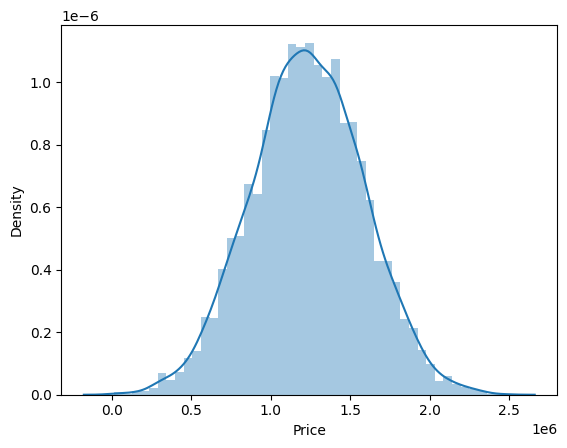

In [ ]:
sns.distplot(df_immobilier["Price"])

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([  15938.65792329,   31140.51762019,   88591.77016004, ...,
         2332110.74012441, 2370231.32010155, 2469065.5941747 ])),
 (353294.1282059981, 1232072.654142357, 0.9999323356890079))

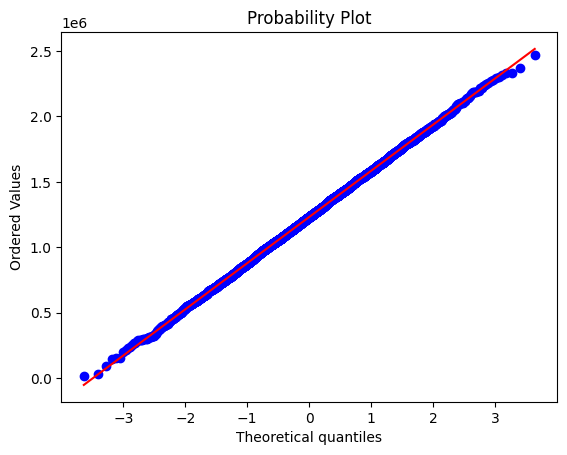

In [ ]:
stats.probplot(df_immobilier["Price"], dist="norm", plot=plt)

<ipython-input-14-e64881f1e77e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_immobilier["Avg. Area Income"])


<Axes: xlabel='Avg. Area Income', ylabel='Density'>

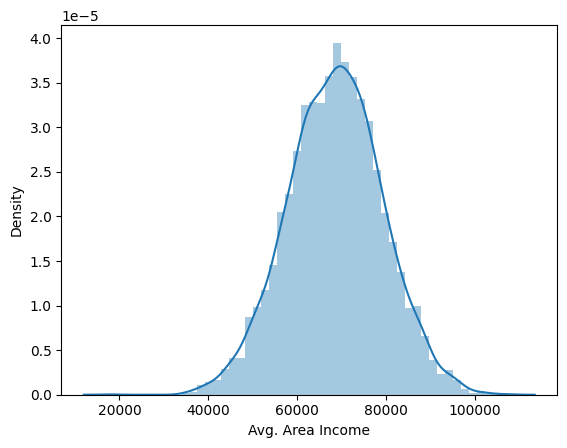

In [ ]:
sns.distplot(df_immobilier["Avg. Area Income"])

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([ 17796.63118954,  35454.71465948,  35608.98623708, ...,
         102881.12090227, 104702.72425703, 107701.74837764])),
 (10661.55248217758, 68583.10898395974, 0.9997667323004618))

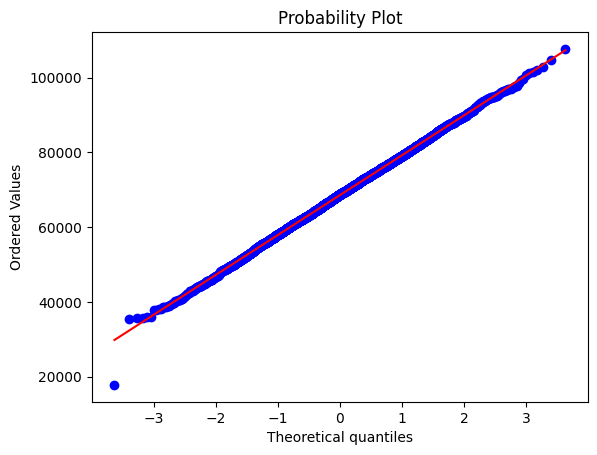

In [ ]:
stats.probplot(df_immobilier["Avg. Area Income"], dist="norm", plot=plt)

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

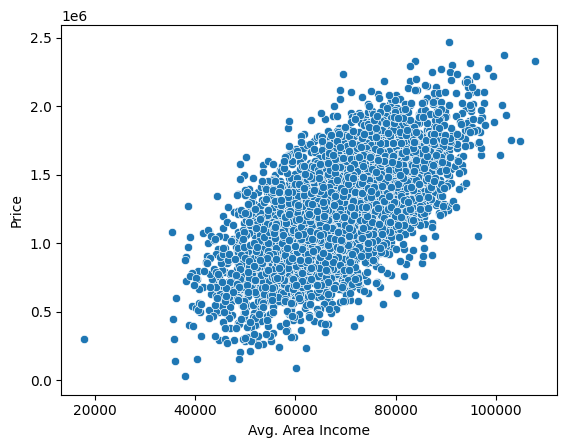

In [ ]:
sns.scatterplot(x="Avg. Area Income", y="Price", data=df_immobilier)

In [ ]:
df_immobilier.drop("Address", axis=1, inplace=True)

<Axes: >

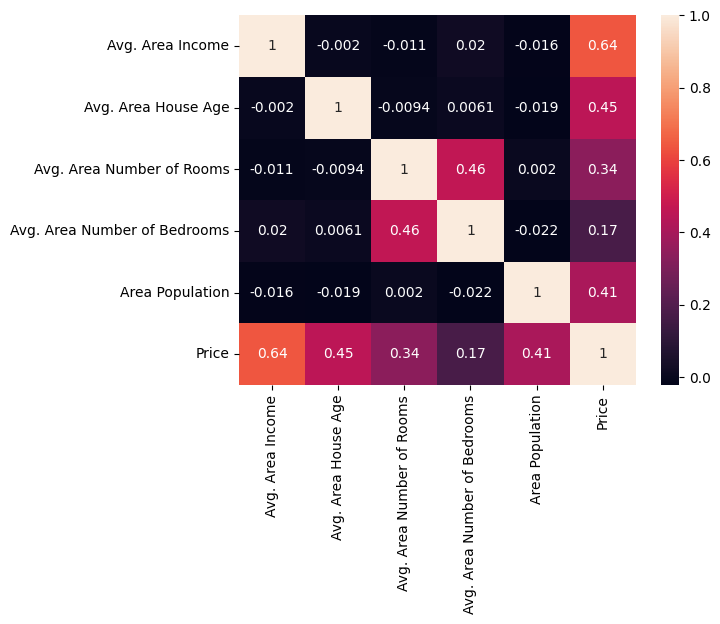

In [ ]:
sns.heatmap(df_immobilier.corr(), annot=True)

In [ ]:
# step 1:

X = df_immobilier[["Avg. Area Income"]]
y = df_immobilier["Price"]

In [ ]:
# step 2:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
# Step 3
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# y = intercept + coef * Avg. Area Income

In [ ]:
print(lg.intercept_)
print(lg.coef_)

-210001.18740504445
[21.02719844]


In [ ]:
# y = -210001 + 21 * Avg. Area Income

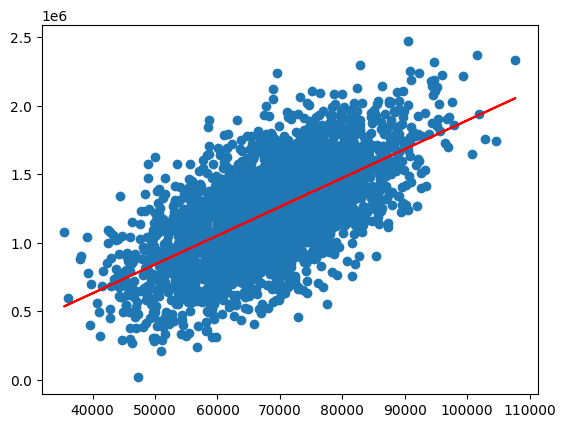

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lg.predict(X_train), color="red")

In [ ]:
print(lg.predict([[25000]]))

[315678.77369096]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
-210001 + 21 * 25000

# Plusieurs variables

In [ ]:
X = df_immobilier.drop(["Price"], axis=1)
y = df_immobilier["Price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
lg_multi = LinearRegression()
lg_multi.fit(X_train, y_train)

LinearRegression()

In [ ]:
lg_multi.intercept_

-2640159.7968526953

In [ ]:
lg_multi.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [ ]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [ ]:
# y = -2640159 + 2.15 * Avg. Area Income + 1.64 * Avg. Area House Age

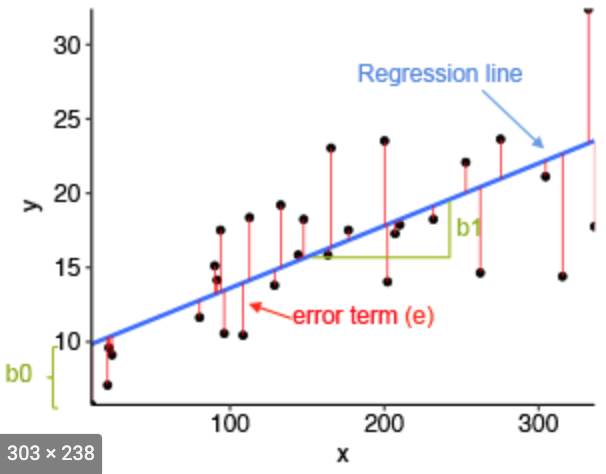

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
y_pred = lg_multi.predict(X_test)

In [ ]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 82288.22251914942
MSE 10460958907.208977
RMSE 102278.82922290897


In [ ]:
# VIF
# Jarque-Bera - Shapiro-Wilk
# Brusch Pegan
# Burbin Watson